### **Electrical Power prediction of a wind Turbine-804**
There are 218588 (above two lakh observations)  and 49 features in the actual dataset and I’ve taken one turbine (R80711) and separated one year (2017) data for this project that contains - 52704 observations.

Number of features - 6
Size (52704, 6)

**Features:Input variable/ features:**

**Wind_speed:** Average wind speed (m/s)

**Date/Time:** one year data ( for 10 minutes intervals)

**Outdoor_temperature:**  surrounding temperature in  (℃) celsius

**Rotor_speed:**  speed to produce electricity, rpm (revolutions per minute)

**Wind direction:** angle of wind in degree
Output/ target variable:

**Active power**: power generated by the wind turbine (unit KW)



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = '/content/drive/MyDrive/la-haute-borne-data-2017-2020.csv'
df = pd.read_csv(path)
df.head()

In [ ]:
df.shape

(210672, 31)

In [ ]:
# sorted
df_sorted = df.sort_values(by=['Date_time'])
df_sorted.reset_index(drop=True, inplace=True)
df_sorted.head(10)

,Wind_turbine_name,Date_time,Ba_avg,Rt_avg,DCs_avg,Cm_avg,P_avg,Q_avg,S_avg,Cosphi_avg,...,Ws2_avg,Ws_avg,Wa_avg,Va_avg,Ot_avg,Nf_avg,Nu_avg,Rs_avg,Rbt_avg,Rm_avg
0,R80711,2017-01-01T00:00:00+01:00,-0.990000,12.00,984.64001,1035.01000,76.489998,12.180000,77.489998,0.98,...,4.51,4.56,201.25000,-8.360000,3.83,50.000000,700.33002,9.350000,14.20,742.70001
1,R80736,2017-01-01T00:00:00+01:00,0.000000,11.00,973.08002,499.39999,21.969999,11.660000,25.200001,1.00,...,4.43,4.11,203.96001,11.670000,3.17,50.000000,700.54999,9.229999,15.54,216.25000
2,R80790,2017-01-01T00:00:00+01:00,-1.000000,13.00,966.50000,947.41998,65.349998,13.420000,66.760002,0.98,...,4.58,4.43,207.92000,8.130000,4.33,50.000000,700.50000,9.250000,18.60,641.65002
3,R80721,2017-01-01T00:00:00+01:00,91.529999,12.21,3.75000,4.81000,-5.800000,0.000000,5.800000,1.00,...,3.34,3.23,204.91000,13.020000,3.46,50.000000,699.66998,0.000000,9.30,0.00000
4,R80711,2017-01-01T00:10:00+01:00,-0.990000,12.00,997.34998,1080.35000,82.330002,11.350000,83.139999,0.98,...,4.88,4.99,193.71001,-15.920000,3.82,49.939999,698.03998,9.479999,14.49,788.98999
5,R80736,2017-01-01T00:10:00+01:00,-0.060000,11.01,973.14001,513.48999,23.330000,9.979999,25.709999,1.00,...,4.10,3.83,200.91000,8.530000,3.23,49.939999,698.25000,9.229999,15.81,229.63000
6,R80721,2017-01-01T00:10:00+01:00,91.529999,11.73,3.75000,4.84000,-5.760000,0.000000,5.760000,1.00,...,3.67,3.45,197.74001,5.820000,3.41,49.939999,697.38000,0.000000,9.29,0.00000
7,R80790,2017-01-01T00:10:00+01:00,-0.860000,13.00,964.28998,840.17999,53.500000,12.980000,55.119999,1.00,...,4.36,4.22,203.41000,3.680000,4.37,49.939999,698.16998,9.229999,18.50,526.63000
8,R80790,2017-01-01T00:20:00+01:00,-0.620000,13.00,964.27002,791.29999,49.689999,12.700000,51.340000,1.00,...,4.23,4.09,201.07001,1.240000,4.27,49.990002,700.37000,9.229999,18.50,489.14001
9,R80711,2017-01-01T00:20:00+01:00,-0.990000,12.00,972.06000,945.45001,66.480003,11.050000,67.449997,0.98,...,4.76,4.84,193.58000,-16.059999,3.85,49.990002,700.16998,9.240000,14.77,654.10999


In [ ]:
#df_data = df_sorted[(df_sorted["Wind_turbine_name"] == "R80711") | (df_sorted["Wind_turbine_name"] == "R80721")]

In [ ]:
#turbine=df_data.iloc[0:10000,0:]
turbine=df_sorted.iloc[0:12000,0:]


In [ ]:
turbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Wind_turbine_name  12000 non-null  object 
 1   Date_time          12000 non-null  object 
 2   Ba_avg             11994 non-null  float64
 3   Rt_avg             11994 non-null  float64
 4   DCs_avg            11994 non-null  float64
 5   Cm_avg             11994 non-null  float64
 6   P_avg              11994 non-null  float64
 7   Q_avg              11994 non-null  float64
 8   S_avg              11994 non-null  float64
 9   Cosphi_avg         11994 non-null  float64
 10  Ds_avg             11994 non-null  float64
 11  Db1t_avg           11994 non-null  float64
 12  Db2t_avg           11994 non-null  float64
 13  Dst_avg            11994 non-null  float64
 14  Gb1t_avg           11994 non-null  float64
 15  Gb2t_avg           11994 non-null  float64
 16  Git_avg            119

In [ ]:
turbine.columns = df.columns.str.rstrip("_avg")
turbine["Wind_turbine_name"].value_counts()


R80711    3000
R80736    3000
R80790    3000
R80721    3000
Name: Wind_turbine_name, dtype: int64

In [ ]:
turbine.to_csv(r'turbine_31.csv', index = False)# this data set now usingdat

In [ ]:
df["Wind_turbine_name"].value_counts()

R80711    52704
R80736    52704
R80721    52704
R80790    52560
Name: Wind_turbine_name, dtype: int64

In [ ]:
df.columns

Index(['Wind_turbine_name', 'Date_time', 'Ba_avg', 'Rt_avg', 'DCs_avg',
       'Cm_avg', 'P_avg', 'Q_avg', 'S_avg', 'Cosphi_avg', 'Ds_avg', 'Db1t_avg',
       'Db2t_avg', 'Dst_avg', 'Gb1t_avg', 'Gb2t_avg', 'Git_avg', 'Gost_avg',
       'Ya_avg', 'Yt_avg', 'Ws1_avg', 'Ws2_avg', 'Ws_avg', 'Wa_avg', 'Va_avg',
       'Ot_avg', 'Nf_avg', 'Nu_avg', 'Rs_avg', 'Rbt_avg', 'Rm_avg'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210672 entries, 0 to 210671
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Wind_turbine_name  210672 non-null  object 
 1   Date_time          210672 non-null  object 
 2   Ba_avg             208917 non-null  float64
 3   Rt_avg             208920 non-null  float64
 4   DCs_avg            208920 non-null  float64
 5   Cm_avg             208920 non-null  float64
 6   P_avg              209211 non-null  float64
 7   Q_avg              205792 non-null  float64
 8   S_avg              208918 non-null  float64
 9   Cosphi_avg         208920 non-null  float64
 10  Ds_avg             207847 non-null  float64
 11  Db1t_avg           208920 non-null  float64
 12  Db2t_avg           208920 non-null  float64
 13  Dst_avg            208920 non-null  float64
 14  Gb1t_avg           208920 non-null  float64
 15  Gb2t_avg           208920 non-null  float64
 16  Gi

In [ ]:
#df_new = df. iloc[:, [0,1,6,22,23,25,28]]
df_new = df. iloc[:, [0,1,6,22,23,24, 25,26,27,28]]


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210672 entries, 0 to 210671
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Wind_turbine_name  210672 non-null  object 
 1   Date_time          210672 non-null  object 
 2   P_avg              209211 non-null  float64
 3   Ws_avg             209211 non-null  float64
 4   Wa_avg             209211 non-null  float64
 5   Va_avg             77132 non-null   float64
 6   Ot_avg             208920 non-null  float64
 7   Nf_avg             208918 non-null  float64
 8   Nu_avg             208918 non-null  float64
 9   Rs_avg             206310 non-null  float64
dtypes: float64(8), object(2)
memory usage: 16.1+ MB


In [ ]:
df_new.head(10)

,Wind_turbine_name,Date_time,P_avg,Ws_avg,Wa_avg,Va_avg,Ot_avg,Nf_avg,Nu_avg,Rs_avg
0,R80711,2017-01-01T00:00:00+01:00,76.489998,4.56,201.25000,-8.360000,3.83,50.000000,700.33002,9.350000
1,R80736,2017-01-01T00:00:00+01:00,21.969999,4.11,203.96001,11.670000,3.17,50.000000,700.54999,9.229999
2,R80790,2017-01-01T00:00:00+01:00,65.349998,4.43,207.92000,8.130000,4.33,50.000000,700.50000,9.250000
3,R80721,2017-01-01T00:00:00+01:00,-5.800000,3.23,204.91000,13.020000,3.46,50.000000,699.66998,0.000000
4,R80711,2017-01-01T00:10:00+01:00,82.330002,4.99,193.71001,-15.920000,3.82,49.939999,698.03998,9.479999
5,R80736,2017-01-01T00:10:00+01:00,23.330000,3.83,200.91000,8.530000,3.23,49.939999,698.25000,9.229999
6,R80721,2017-01-01T00:10:00+01:00,-5.760000,3.45,197.74001,5.820000,3.41,49.939999,697.38000,0.000000
7,R80790,2017-01-01T00:10:00+01:00,53.500000,4.22,203.41000,3.680000,4.37,49.939999,698.16998,9.229999
8,R80790,2017-01-01T00:20:00+01:00,49.689999,4.09,201.07001,1.240000,4.27,49.990002,700.37000,9.229999
9,R80711,2017-01-01T00:20:00+01:00,66.480003,4.84,193.58000,-16.059999,3.85,49.990002,700.16998,9.240000


In [ ]:
# Sort the dataset by date 
df_sorted = df_new.sort_values(by=['Date_time'])
df_sorted.reset_index(drop=True, inplace=True)
df_sorted

,Wind_turbine_name,Date_time,P_avg,Ws_avg,Wa_avg,Va_avg,Ot_avg,Nf_avg,Nu_avg,Rs_avg
0,R80711,2017-01-01T00:00:00+01:00,76.489998,4.56,201.25000,-8.36,3.83,50.000000,700.33002,9.350000
1,R80736,2017-01-01T00:00:00+01:00,21.969999,4.11,203.96001,11.67,3.17,50.000000,700.54999,9.229999
2,R80790,2017-01-01T00:00:00+01:00,65.349998,4.43,207.92000,8.13,4.33,50.000000,700.50000,9.250000
3,R80721,2017-01-01T00:00:00+01:00,-5.800000,3.23,204.91000,13.02,3.46,50.000000,699.66998,0.000000
4,R80711,2017-01-01T00:10:00+01:00,82.330002,4.99,193.71001,-15.92,3.82,49.939999,698.03998,9.479999
...,...,...,...,...,...,...,...,...,...,...
210667,R80790,2017-12-31T23:40:00+01:00,1428.450000,10.68,235.20000,NaN,8.70,49.980000,710.33000,17.150000
210668,R80721,2017-12-31T23:50:00+01:00,1285.570000,9.83,222.42000,NaN,8.80,49.990000,710.49000,16.990000
210669,R80790,2017-12-31T23:50:00+01:00,1489.310000,10.97,237.35000,NaN,8.70,49.990000,711.04000,17.140000
210670,R80736,2017-12-31T23:50:00+01:00,1509.280000,10.66,222.72000,NaN,8.96,49.990000,711.15000,17.160000


In [ ]:
#last= df_sorted.loc[]
#class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]
#df_data = df_sorted[(df_sorted["Wind_turbine_name"] == "R80711") | (df_sorted["Wind_turbine_name"] == "R80721")]

In [ ]:
#df_data.head(10)

In [ ]:
#turbine = df_sorted.iloc[0:17000,0:]
#turbine=df_data.iloc[0:10000,0:]
turbine = df_sorted.iloc[0:12000,0:]


In [ ]:
turbine.head(20)

,Wind_turbine_name,Date_time,P_avg,Ws_avg,Wa_avg,Va_avg,Ot_avg,Nf_avg,Nu_avg,Rs_avg
0,R80711,2017-01-01T00:00:00+01:00,76.489998,4.56,201.25000,-8.360000,3.83,50.000000,700.33002,9.350000
1,R80736,2017-01-01T00:00:00+01:00,21.969999,4.11,203.96001,11.670000,3.17,50.000000,700.54999,9.229999
2,R80790,2017-01-01T00:00:00+01:00,65.349998,4.43,207.92000,8.130000,4.33,50.000000,700.50000,9.250000
3,R80721,2017-01-01T00:00:00+01:00,-5.800000,3.23,204.91000,13.020000,3.46,50.000000,699.66998,0.000000
4,R80711,2017-01-01T00:10:00+01:00,82.330002,4.99,193.71001,-15.920000,3.82,49.939999,698.03998,9.479999
5,R80736,2017-01-01T00:10:00+01:00,23.330000,3.83,200.91000,8.530000,3.23,49.939999,698.25000,9.229999
6,R80721,2017-01-01T00:10:00+01:00,-5.760000,3.45,197.74001,5.820000,3.41,49.939999,697.38000,0.000000
7,R80790,2017-01-01T00:10:00+01:00,53.500000,4.22,203.41000,3.680000,4.37,49.939999,698.16998,9.229999
8,R80790,2017-01-01T00:20:00+01:00,49.689999,4.09,201.07001,1.240000,4.27,49.990002,700.37000,9.229999
9,R80711,2017-01-01T00:20:00+01:00,66.480003,4.84,193.58000,-16.059999,3.85,49.990002,700.16998,9.240000


In [ ]:
turbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Wind_turbine_name  12000 non-null  object 
 1   Date_time          12000 non-null  object 
 2   P_avg              11994 non-null  float64
 3   Ws_avg             11994 non-null  float64
 4   Wa_avg             11994 non-null  float64
 5   Va_avg             11994 non-null  float64
 6   Ot_avg             11994 non-null  float64
 7   Nf_avg             11994 non-null  float64
 8   Nu_avg             11994 non-null  float64
 9   Rs_avg             11994 non-null  float64
dtypes: float64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
turbine["Wind_turbine_name"].value_counts()

R80711    3000
R80736    3000
R80790    3000
R80721    3000
Name: Wind_turbine_name, dtype: int64

In [ ]:
turbine_dataset= turbine.rename(columns = {'Wind_turbine_name':'turbine_name','Date_time':'Date_time',
                                                   'P_avg':'power','Ws_avg':'wind_speed',
                                                   'Wa_avg':'wind_direction','Ot_avg':'temperature'
                                                   , 'Rs_avg':'rotor_speed'})

In [ ]:
turbine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   turbine_name    12000 non-null  object 
 1   Date_time       12000 non-null  object 
 2   power           11994 non-null  float64
 3   wind_speed      11994 non-null  float64
 4   wind_direction  11994 non-null  float64
 5   Va_avg          11994 non-null  float64
 6   temperature     11994 non-null  float64
 7   Nf_avg          11994 non-null  float64
 8   Nu_avg          11994 non-null  float64
 9   rotor_speed     11994 non-null  float64
dtypes: float64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
turbine_dataset.to_csv(r'turbine_9.csv', index = False)# this data set now usingdat

In [ ]:
turbine= turbine.drop(['Date_time'], axis=1)

In [ ]:
turbine_dataset.shape

(17000, 6)

In [ ]:
turbine_dataset.head(5)

,turbine_name,power,wind_speed,wind_direction,temperature,rotor_speed
0,R80711,76.489998,4.56,201.25000,3.83,9.350000
1,R80736,21.969999,4.11,203.96001,3.17,9.229999
2,R80790,65.349998,4.43,207.92000,4.33,9.250000
3,R80721,-5.800000,3.23,204.91000,3.46,0.000000
4,R80711,82.330002,4.99,193.71001,3.82,9.479999


In [ ]:
turbine_dataset.to_csv(r'wind_turbine.csv', index = False)# this data set now using

In [ ]:
df_804_data = df_new.loc[df_new["Wind_turbine_name"] == "R80711"]

In [ ]:
df_804_data.head(10)

,Wind_turbine_name,Date_time,P_avg,Ws_avg,Wa_avg,Ot_avg,Rs_avg
0,R80711,2017-01-01T00:00:00+01:00,76.489998,4.56,201.25000,3.83,9.350000
4,R80711,2017-01-01T00:10:00+01:00,82.330002,4.99,193.71001,3.82,9.479999
9,R80711,2017-01-01T00:20:00+01:00,66.480003,4.84,193.58000,3.85,9.240000
15,R80711,2017-01-01T00:30:00+01:00,83.230003,4.70,197.64000,3.83,9.500000
17,R80711,2017-01-01T00:40:00+01:00,85.250000,4.87,195.85001,3.78,9.540000
21,R80711,2017-01-01T00:50:00+01:00,85.010002,4.98,194.88000,3.57,9.530000
27,R80711,2017-01-01T01:00:00+01:00,143.060000,5.36,195.17000,3.76,10.680000
30,R80711,2017-01-01T01:10:00+01:00,262.190000,5.91,180.41000,3.61,12.530000
32,R80711,2017-01-01T01:20:00+01:00,393.030000,6.19,208.12000,3.33,14.100000
38,R80711,2017-01-01T01:30:00+01:00,410.570010,5.94,198.47000,3.27,14.290000


In [ ]:
df_804_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52704 entries, 0 to 210671
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Wind_turbine_name  52704 non-null  object 
 1   Date_time          52704 non-null  object 
 2   P_avg              52206 non-null  float64
 3   Ws_avg             52206 non-null  float64
 4   Wa_avg             52206 non-null  float64
 5   Ot_avg             52123 non-null  float64
 6   Rs_avg             51458 non-null  float64
dtypes: float64(5), object(2)
memory usage: 3.2+ MB


In [ ]:
df_turbine = df_804_data.set_axis(["Wind_turbine_name", "Date_time","Power","wind_speed","wind_direction","temperature","rotor_speed"], axis=1)

In [ ]:
df_turbine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52704 entries, 0 to 210671
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Wind_turbine_name  52704 non-null  object 
 1   Date_time          52704 non-null  object 
 2   Power              52206 non-null  float64
 3   wind_speed         52206 non-null  float64
 4   wind_direction     52206 non-null  float64
 5   temperature        52123 non-null  float64
 6   rotor_speed        51458 non-null  float64
dtypes: float64(5), object(2)
memory usage: 3.2+ MB


In [ ]:
#df_turbine.to_csv(r'turbine.csv', index = False)# this data set now using

In [ ]:
final_dataset= df_turbine.dropna()

In [ ]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51452 entries, 0 to 210671
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Wind_turbine_name  51452 non-null  object 
 1   Date_time          51452 non-null  object 
 2   Power              51452 non-null  float64
 3   wind_speed         51452 non-null  float64
 4   wind_direction     51452 non-null  float64
 5   temperature        51452 non-null  float64
 6   rotor_speed        51452 non-null  float64
dtypes: float64(5), object(2)
memory usage: 3.1+ MB


In [ ]:
final_dataset.describe()

,Power,wind_speed,wind_direction,temperature,rotor_speed
count,51452.000000,51452.000000,51452.000000,51452.000000,51452.000000
mean,399.341420,5.695284,191.946492,11.947907,11.012476
std,469.271670,2.626315,88.608310,8.089430,5.600552
min,-17.389999,0.000000,0.050000,-7.940000,0.000000
25%,40.597500,4.230000,131.340000,5.750000,9.230000
50%,223.915000,5.650000,211.580000,11.610000,12.080000
75%,583.490000,7.010000,254.592500,17.800000,15.822500
max,2050.679900,20.500000,359.930000,35.700000,17.210000


In [ ]:
final_dataset.dtypes

Wind_turbine_name     object
Date_time             object
Power                float64
wind_speed           float64
wind_direction       float64
temperature          float64
rotor_speed          float64
dtype: object

In [ ]:
#correlation check
df_cor = final_dataset.corr()

display(df_cor)

,Power,wind_speed,wind_direction,temperature,rotor_speed
Power,1.000000,0.907301,0.055546,-0.217021,0.728004
wind_speed,0.907301,1.000000,0.087369,-0.151200,0.859388
wind_direction,0.055546,0.087369,1.000000,-0.010027,0.077302
temperature,-0.217021,-0.151200,-0.010027,1.000000,-0.119797
rotor_speed,0.728004,0.859388,0.077302,-0.119797,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

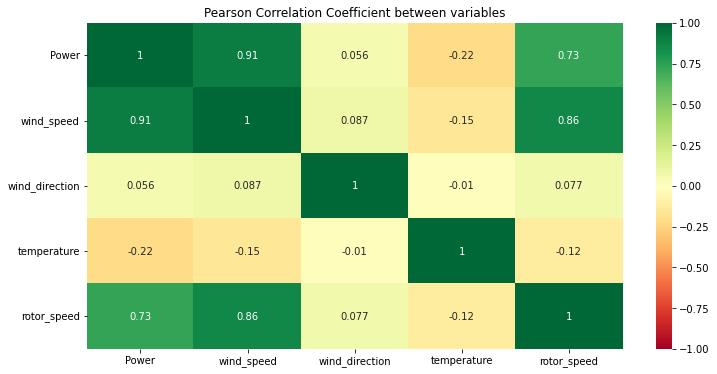

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df_cor, annot=True, cmap="RdYlGn", vmax=1, vmin=-1)
plt.title("Pearson Correlation Coefficient between variables")
plt.show()

In [ ]:
#df_last.to_csv(r'normalize.csv', index = False)
#command for save the dataset, change the name normalize.csv

In [ ]:
# now this is the dataset, i will work in R language
#path1 = '/content/turbine_dataset_804_project.csv'
#df1 = pd.read_csv(path1)
#df1.head()